In [ ]:
import numpy as np
import copy
import matplotlib.pyplot as plt

import scipy
from scipy import signal,stats
from scipy.fft import rfft,rfftfreq
from scipy import stats

import seaborn as sns
import pandas as pd
import sklearn
import seaborn as sns

from awear_function_lib import load_eeg_data, apply_filters, plot_psd, plot_ratios_bar, calculate_ratios
from awear_function_lib import plot_spectrogram, plot_band_ratios_spectrogram, plot_band_ratios_box_whisker, plot_band_ratio_heatmap, plot_avg_power_heatmap

import importlib
import awear_function_lib
importlib.reload(awear_function_lib) 

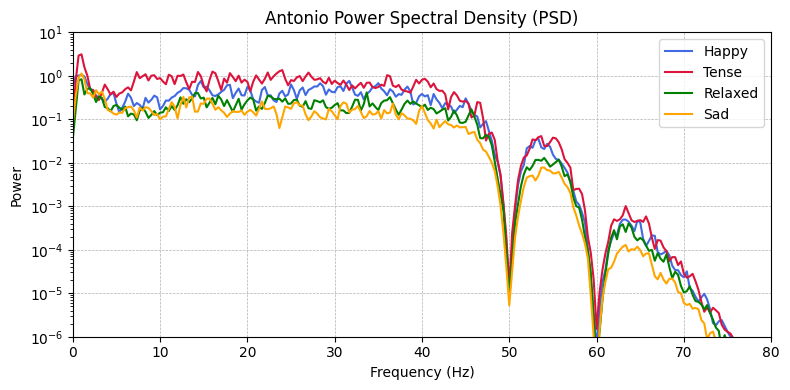

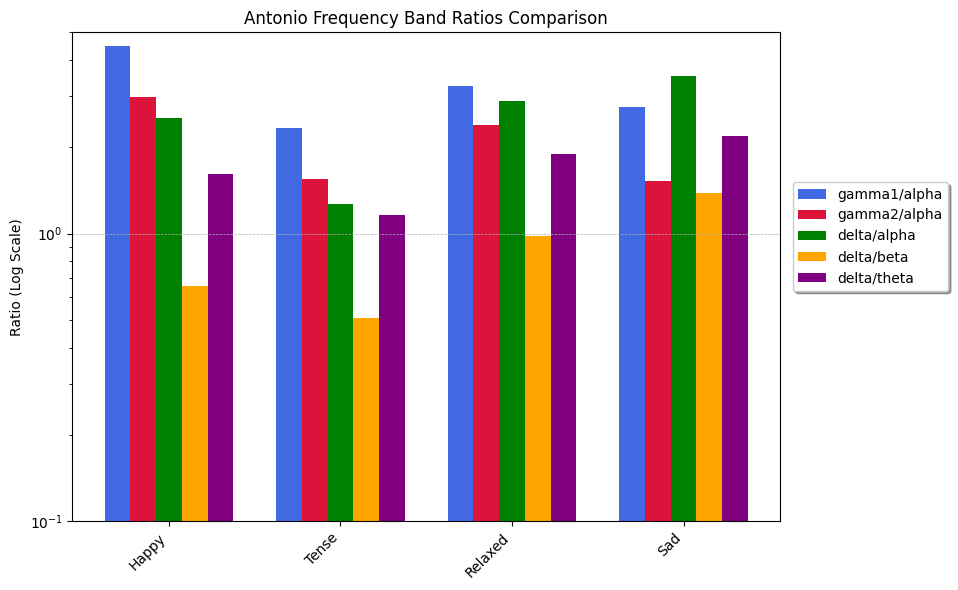

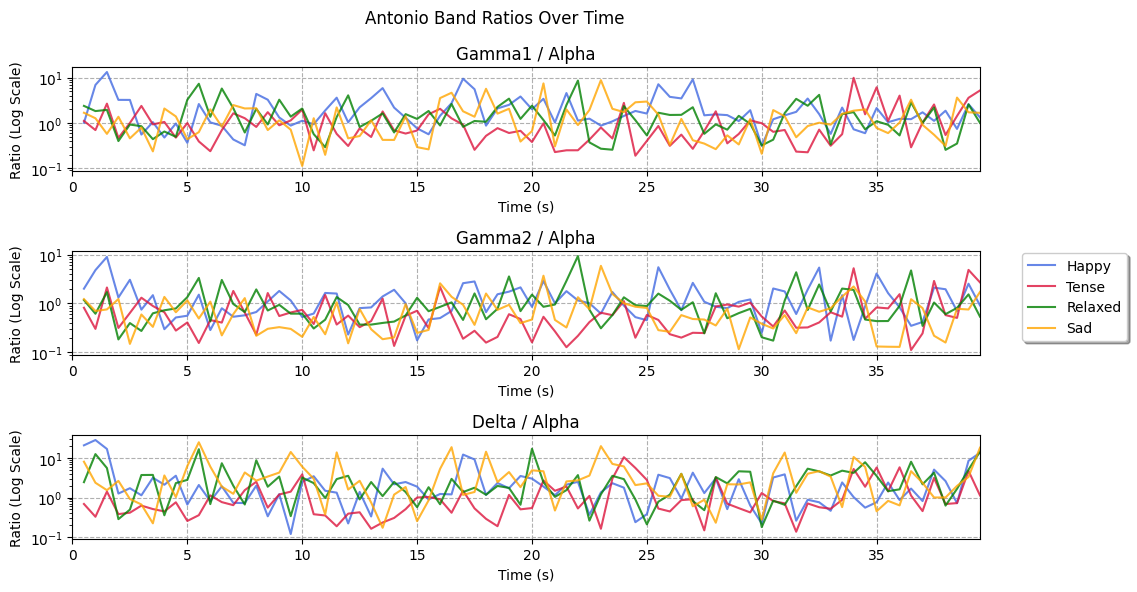

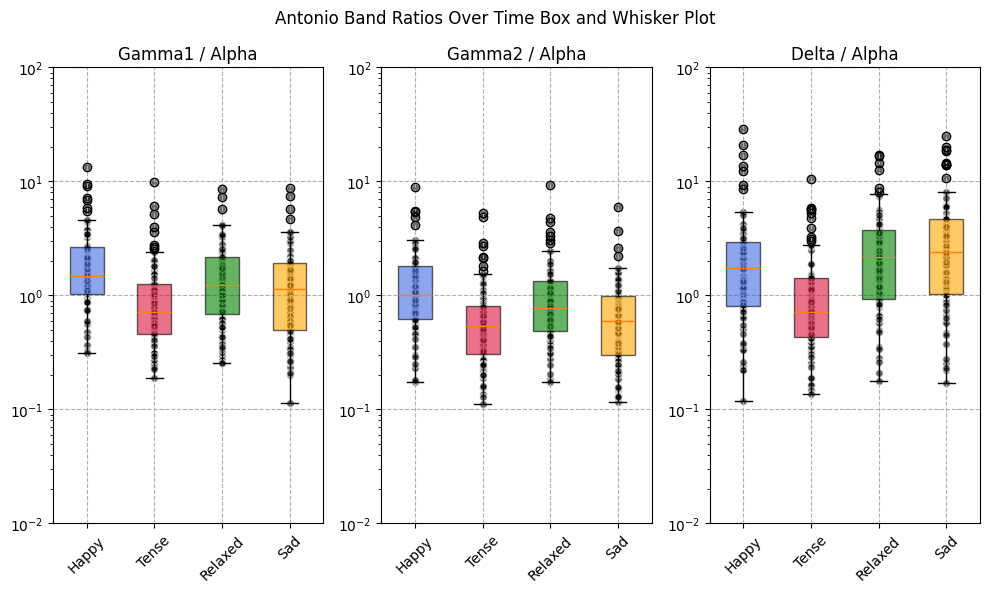

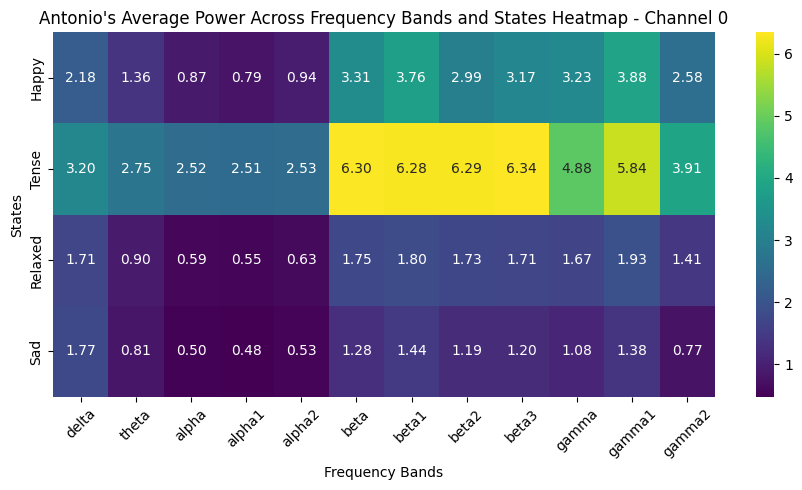

In [ ]:
# Define file paths and labels
file_paths = [
    '.../Subject 3 Antonio/Erotic_5.txt',
    '.../Subject 3 Antonio/Fear 2_1.txt',
    '.../Subject 3 Antonio/Scenery_2.txt',
    '.../Subject 3 Antonio/Sadness_7.txt'
]
labels = [
    "Happy",
    "Tense",
    "Relaxed",
    "Sad"
]

# Load EEG data with correct labels
antonio_data = load_eeg_data(file_paths=file_paths, data_type="openbci", 
                     segments=[(80,120)], 
                     fs=200, labels=labels, channel=0)  

for i,(state, data) in enumerate(antonio_data.items()):
    ana_mask = abs(data - np.mean(data)) > 2 * np.std(data) # Identify outliers
    
    # Replace outliers using linear interpolation
    indices = np.arange(len(data)) 
    ch_cleaned = np.copy(data)
    ch_cleaned[ana_mask] = np.interp(indices[ana_mask], indices[~ana_mask], data[~ana_mask])
    
    antonio_data[state] = ch_cleaned

# Apply filters while preserving labels
antonio_filtered_data = apply_filters(antonio_data, fs=200)

# Plot PSD with correct labels
plot_psd(data_dict=antonio_filtered_data ,y_axis_limits=[1e-6, 1e1], fs=200,name='Antonio')

# Calculate and plot band ratios
ratios = calculate_ratios(antonio_filtered_data, fs=200, selected_ratios=[("gamma1", "alpha"),("gamma2", "alpha"), 
                                                                  ("delta", "alpha"),("delta", "beta"),("delta","theta")])
plot_ratios_bar(ratios, y_axis_limits=[1e-1,5],name='Antonio')

# plot_spectrogram(antonio_filtered_data, fs=200,vmax=3)

plot_band_ratios_spectrogram(antonio_filtered_data, fs=200, selected_ratios=[("gamma1", "alpha"), ("gamma2", "alpha"), ("delta", "alpha")],
                             y_axis_limits=None,name='Antonio')

plot_band_ratios_box_whisker(antonio_filtered_data, fs=200, selected_ratios=[("gamma1", "alpha"), ("gamma2", "alpha"), ("delta", "alpha")],
                             y_axis_limits=[1e-2,1e2],name='Antonio')

# # Plot heatmap
# plot_band_ratio_heatmap(antonio_filtered_data, fs=200, name="Antonio",channel=0)

plot_avg_power_heatmap(antonio_filtered_data, fs=200, name="Antonio",channel=0)

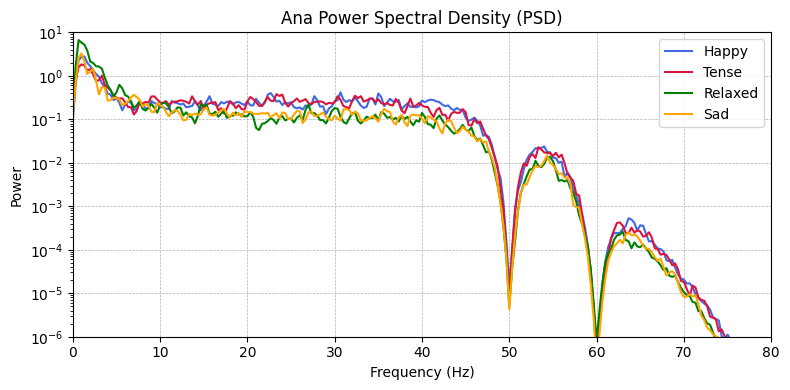

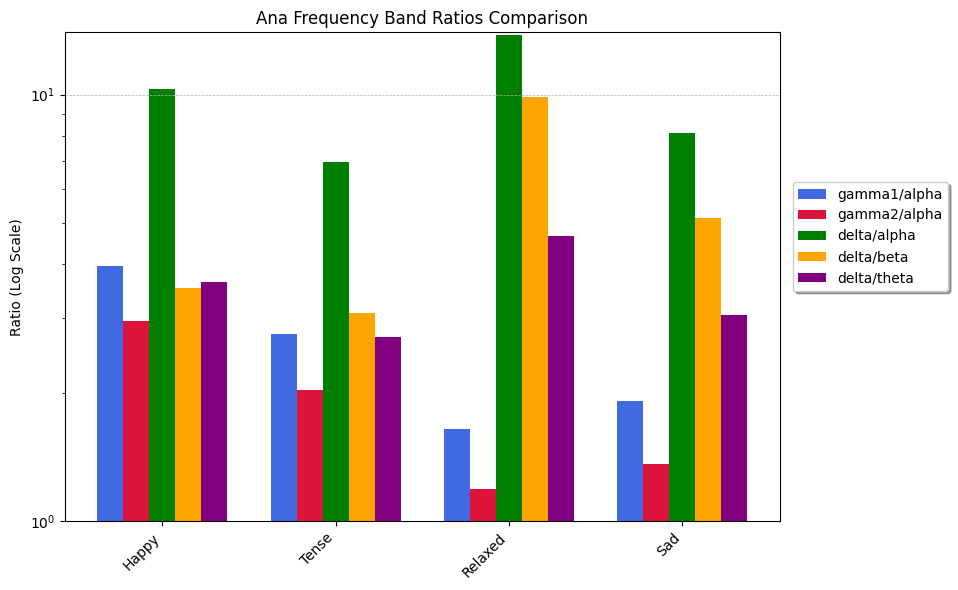

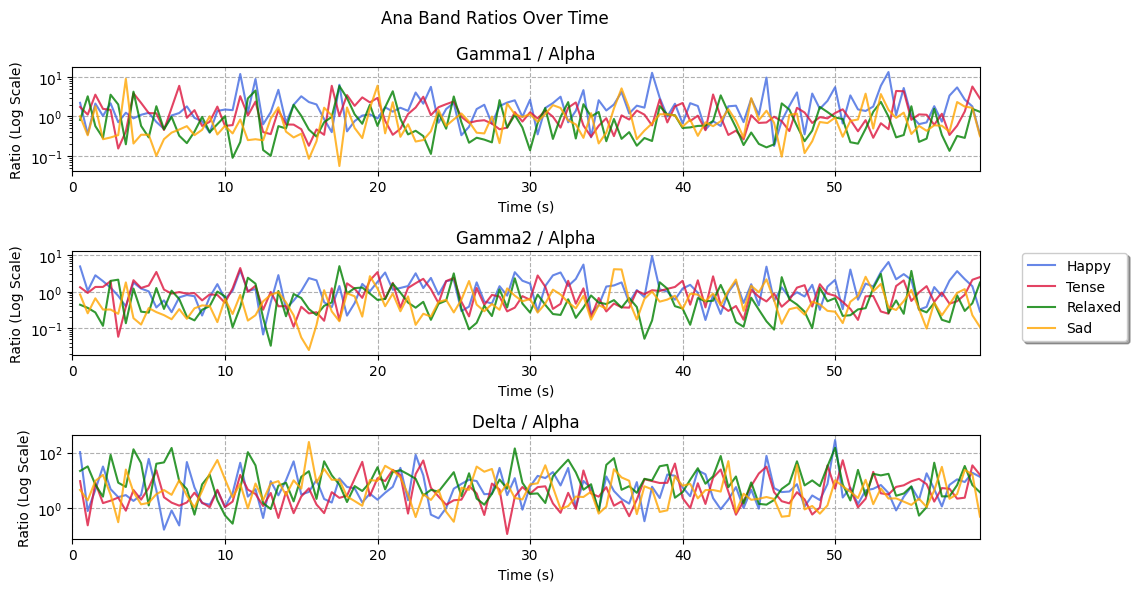

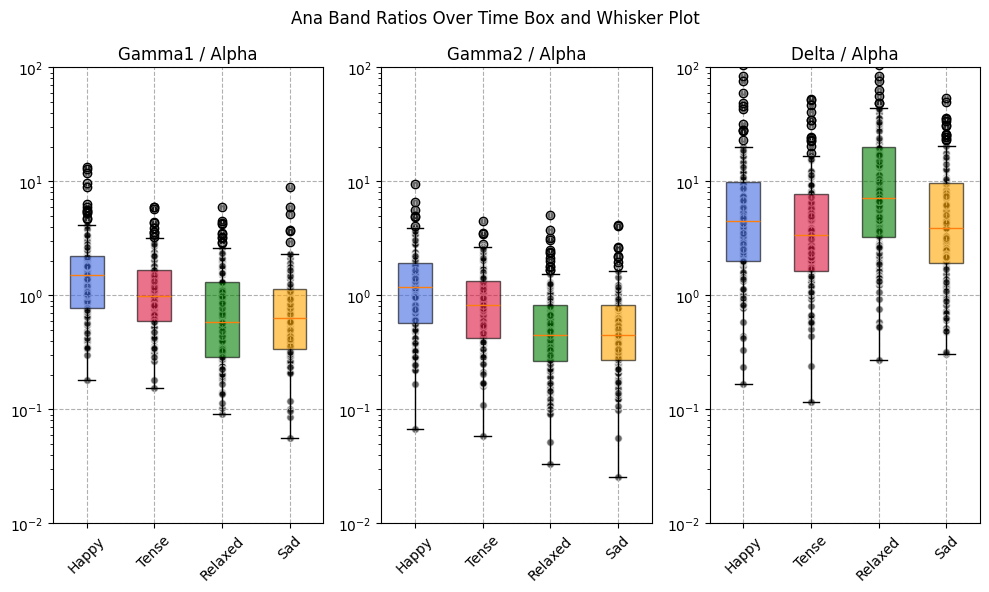

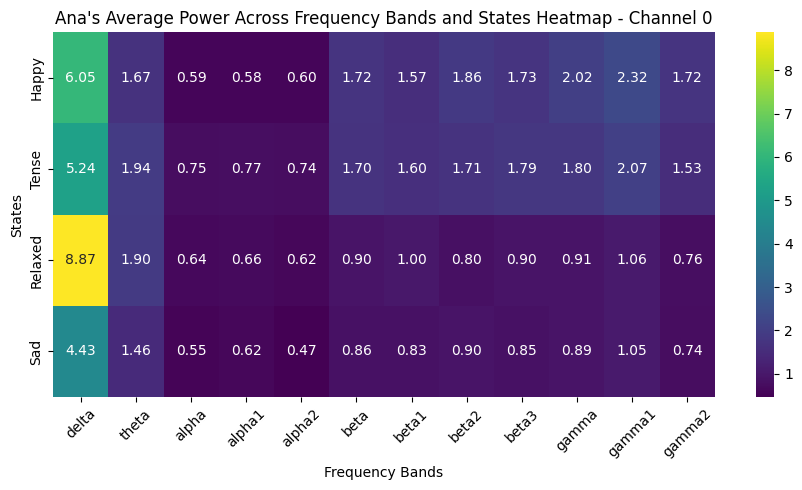

In [ ]:
# Define file paths and labels
file_paths = [
    '.../Subject 5 Ana/Happy_4.txt',
    '.../Subject 5 Ana/Tense_3.txt',
    '.../Subject 5 Ana/Relaxed_4.txt',
    '.../Subject 5 Ana/Sad_5.txt'
]

labels = [
    "Happy",
    "Tense",
    "Relaxed",
    "Sad"
]

# Load EEG data with correct labels
ana_data = load_eeg_data(file_paths=file_paths, data_type="openbci", 
                     segments=[(60,120)], 
                     fs=200, labels=labels, channel=0)  

for i,(state, data) in enumerate(ana_data.items()):
    ana_mask = abs(data - np.mean(data)) > 2 * np.std(data) # Identify outliers
    
    # Replace outliers using linear interpolation
    indices = np.arange(len(data)) 
    ch_cleaned = np.copy(data)
    ch_cleaned[ana_mask] = np.interp(indices[ana_mask], indices[~ana_mask], data[~ana_mask])
    
    ana_data[state] = ch_cleaned

# Apply filters while preserving labels
ana_filtered_data = apply_filters(ana_data, fs=200)

# Plot PSD with correct labels
plot_psd(data_dict=ana_filtered_data, y_axis_limits=[1e-6, 1e1], fs=200,name='Ana')

# Calculate and plot band ratios
ratios = calculate_ratios(ana_filtered_data, fs=200, selected_ratios=[("gamma1", "alpha"),("gamma2", "alpha"),
                                                                   ("delta", "alpha"), ("delta", "beta"),("delta","theta")])
plot_ratios_bar(ratios, y_axis_limits=[1, 14],name='Ana')

# plot_spectrogram(ana_filtered_data, fs=200,vmax=3)

plot_band_ratios_spectrogram(ana_filtered_data, fs=200, selected_ratios=[("gamma1","alpha"), ("gamma2","alpha"), ("delta", "alpha")],
                             y_axis_limits=None,name='Ana')

plot_band_ratios_box_whisker(ana_filtered_data, fs=200, selected_ratios=[("gamma1","alpha"), ("gamma2","alpha"), ("delta", "alpha")], 
                             y_axis_limits=[1e-2,1e2],name='Ana')

# # Plot heatmap
# plot_band_ratio_heatmap(ana_filtered_data, fs=200, name="Ana",channel=0)

plot_avg_power_heatmap(ana_filtered_data, fs=200, name="Ana",channel=0)

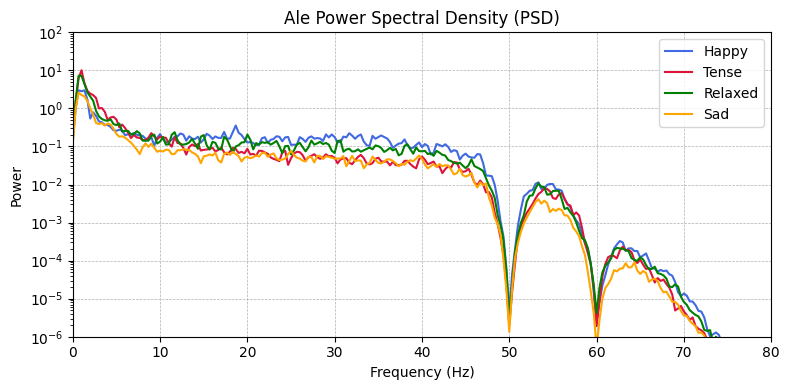

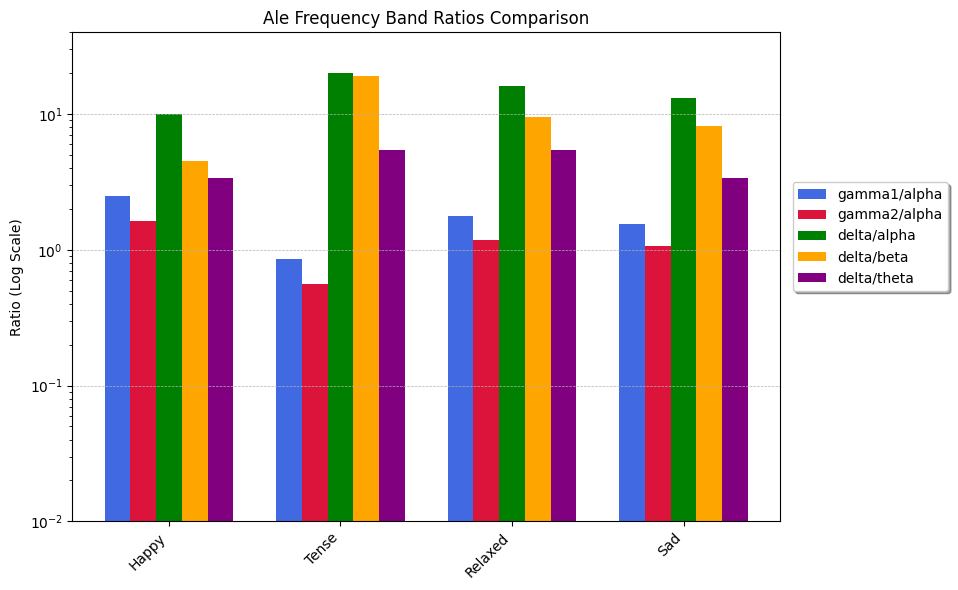

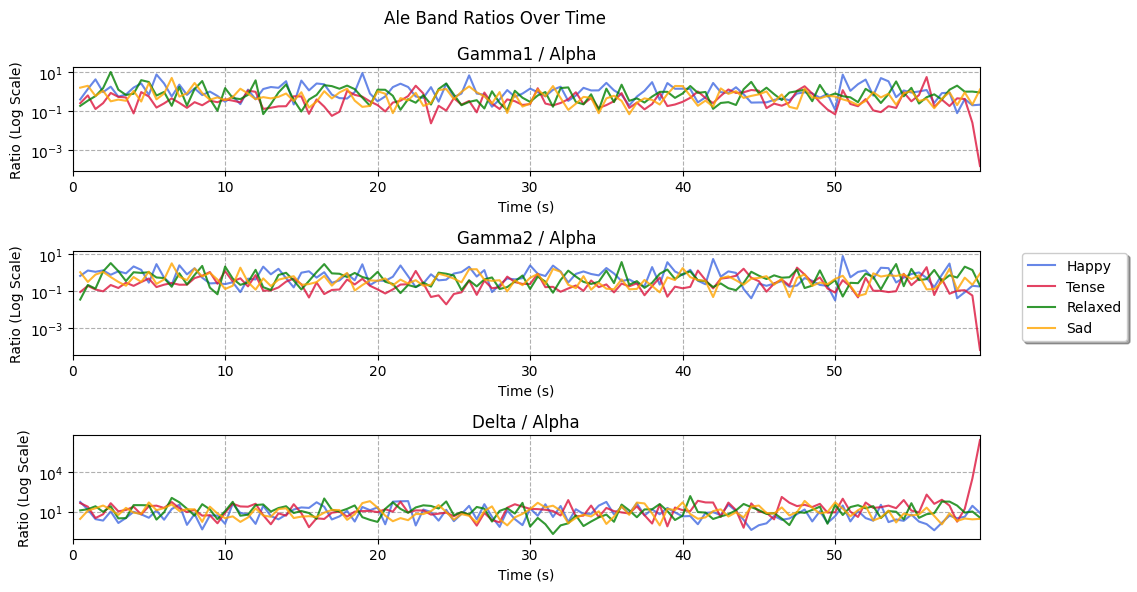

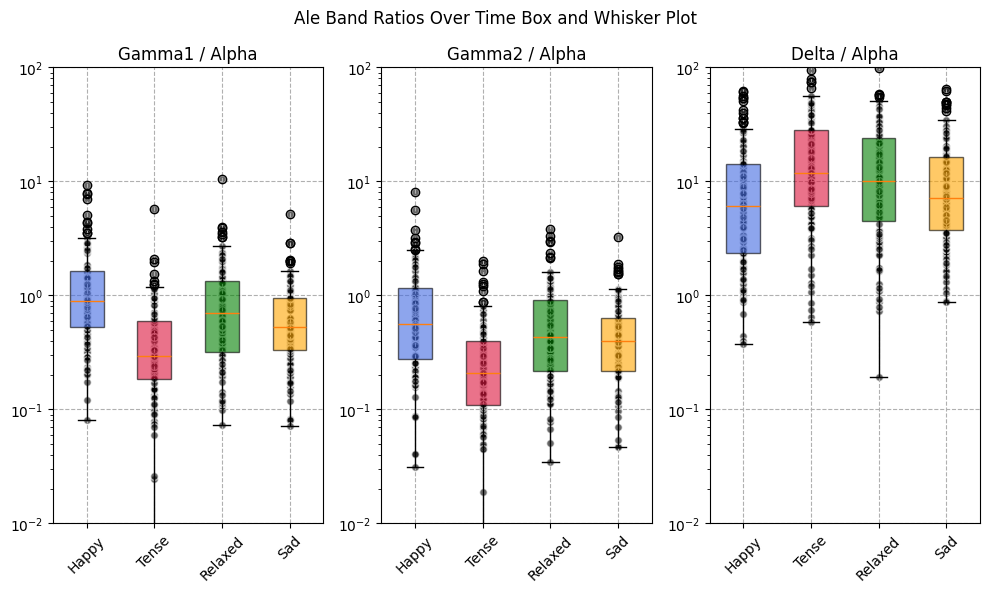

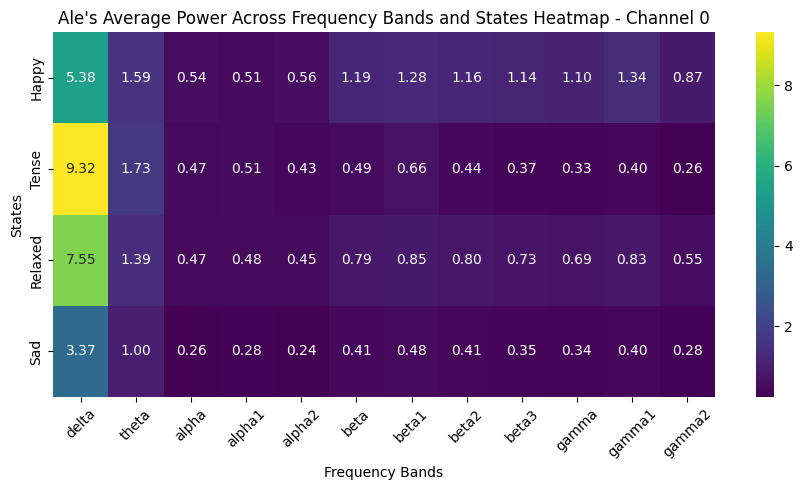

In [ ]:

# Define file paths and labels
file_paths = [
    '.../Subject 1 Ale/Erotic_3.txt',
    '.../Subject 1 Ale/Fear_2.txt',
    '.../Subject 1 Ale/Scenery_4.txt',
    '.../Subject 1 Ale/Sadness_2.txt'
]

labels = [
    "Happy",
    "Tense",
    "Relaxed",
    "Sad"
]

# Load EEG data with correct labels
ale_data = load_eeg_data(file_paths=file_paths, data_type="openbci", 
                     segments=[(40,100)], 
                     fs=200, labels=labels, channel=0)  


for i,(state, data) in enumerate(ale_data.items()):
    ale_mask = abs(data - np.mean(data)) > 2 * np.std(data) # Identify outliers
    
    # Replace outliers using linear interpolation
    indices = np.arange(len(data)) 
    ch_cleaned = np.copy(data)
    ch_cleaned[ale_mask] = np.interp(indices[ale_mask], indices[~ale_mask], data[~ale_mask])
    
    ale_data[state] = ch_cleaned

# Apply filters while preserving labels
ale_filtered_data = apply_filters(ale_data, fs=200)

# Plot PSD with correct labels
plot_psd(data_dict=ale_filtered_data, y_axis_limits=[1e-6, 1e2], fs=200,name='Ale')

# Calculate and plot band ratios
ratios = calculate_ratios(ale_filtered_data, fs=200, selected_ratios=[("gamma1", "alpha"), ("gamma2", "alpha"), 
                                                                  ("delta", "alpha"), ("delta", "beta"),("delta","theta")])
plot_ratios_bar(ratios, y_axis_limits=[1e-2, 40],name='Ale')

# plot_spectrogram(ale_filtered_data, fs=200,vmax=3)

plot_band_ratios_spectrogram(ale_filtered_data, fs=200, selected_ratios=[("gamma1","alpha"), ("gamma2","alpha"), ("delta", "alpha")],
                             y_axis_limits=None,name='Ale')

plot_band_ratios_box_whisker(ale_filtered_data, fs=200, selected_ratios=[("gamma1","alpha"), ("gamma2","alpha"), ("delta", "alpha")], 
                             y_axis_limits=[1e-2,1e2],name='Ale')

# # Plot heatmap
# plot_band_ratio_heatmap(ale_filtered_data, fs=200, name="ale",channel=0)

plot_avg_power_heatmap(ale_filtered_data, fs=200, name="Ale",channel=0)

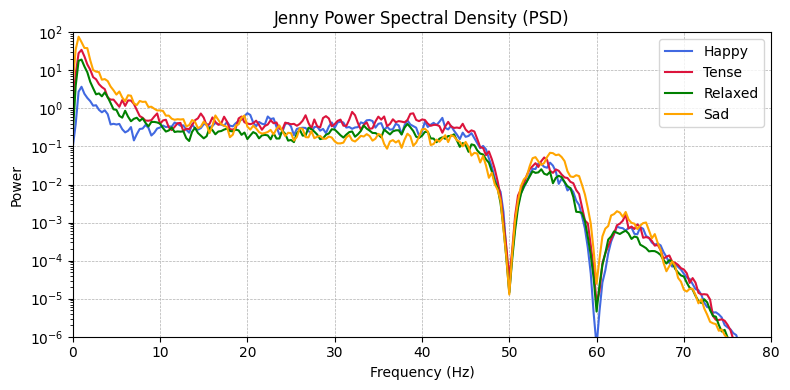

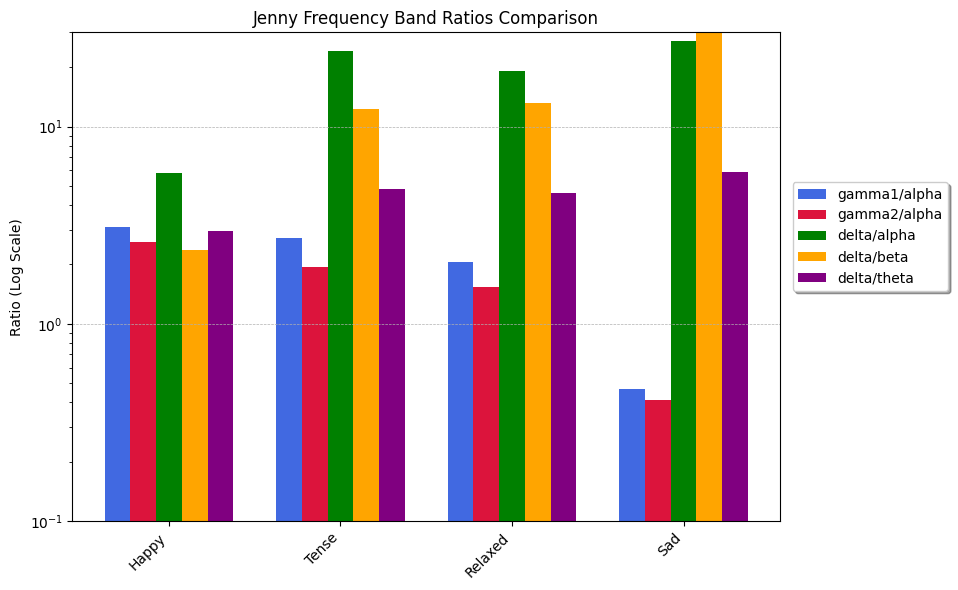

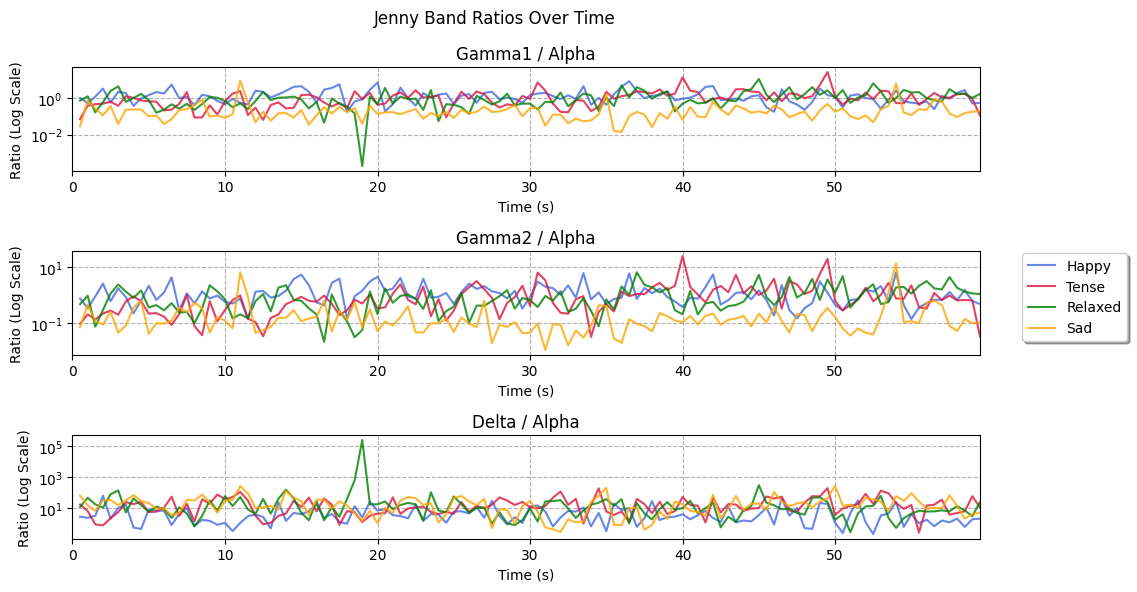

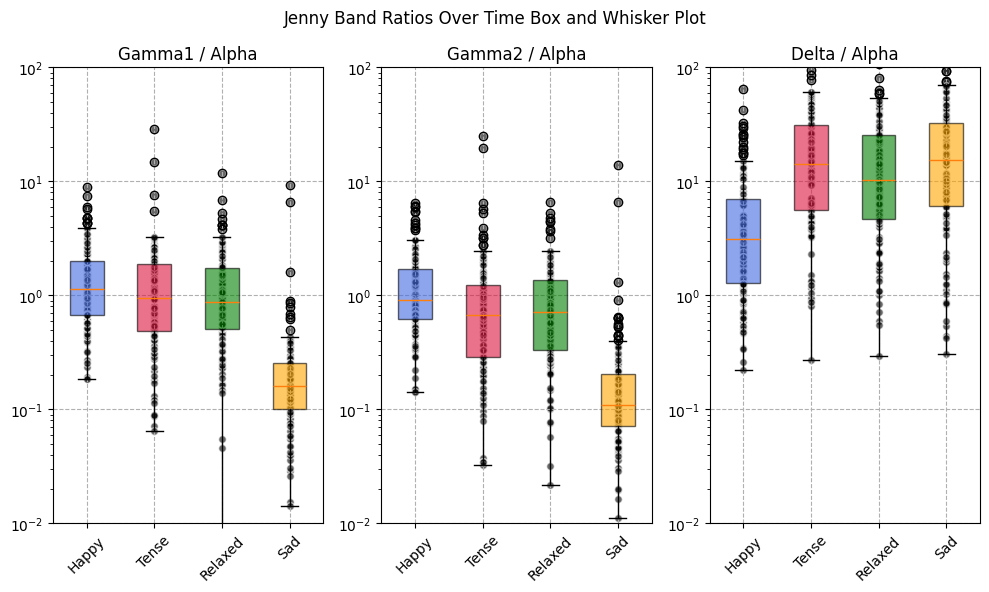

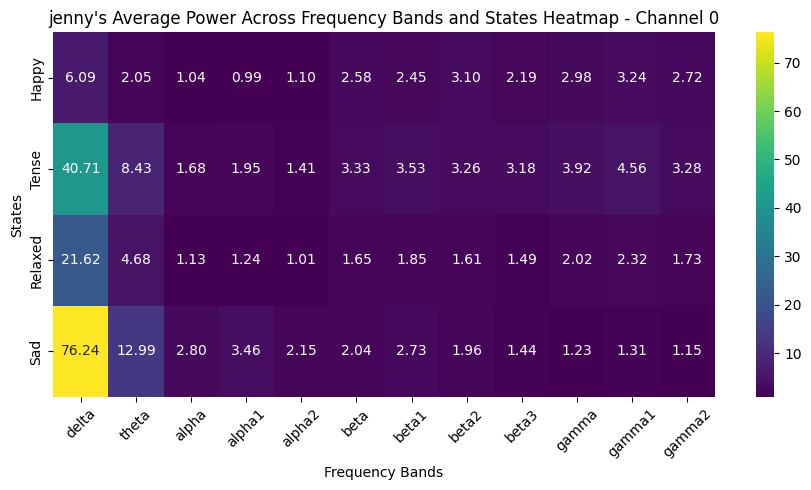

In [ ]:
# Define file paths and labels
file_paths = [
    '.../Subject 2 Jenny/Erotic_2.txt',
    '.../Subject 2 Jenny/Fear2_2.txt',
    '.../Subject 2 Jenny/Scenery_4.txt',
    '.../Subject 2 Jenny/Sadness_2.txt'
]

labels = [
    "Happy",
    "Tense",
    "Relaxed",
    "Sad"
]

# Load EEG data with correct labels
jenny_data = load_eeg_data(file_paths=file_paths, data_type="openbci", 
                     segments=[(40,100)], 
                     fs=200, labels=labels, channel=0)  

for i,(state, data) in enumerate(jenny_data.items()):
    jenny_mask = abs(data - np.mean(data)) > 2 * np.std(data) # Identify outliers
    
    # Replace outliers using linear interpolation
    indices = np.arange(len(data)) 
    ch_cleaned = np.copy(data)
    ch_cleaned[jenny_mask] = np.interp(indices[jenny_mask], indices[~jenny_mask], data[~jenny_mask])
    
    jenny_data[state] = ch_cleaned

# Apply filters while preserving labels
jenny_filtered_data = apply_filters(jenny_data, fs=200)

# Plot PSD with correct labels
plot_psd(data_dict=jenny_filtered_data, y_axis_limits=[1e-6, 1e2], fs=200,name='Jenny')

# Calculate and plot band ratios
ratios = calculate_ratios(jenny_filtered_data, fs=200, selected_ratios=[("gamma1", "alpha"), ("gamma2", "alpha"), 
                                                                  ("delta", "alpha"),("delta","beta"),("delta","theta")])
plot_ratios_bar(ratios, y_axis_limits=[1e-1, 30],name='Jenny')

# plot_spectrogram(jenny_filtered_data, fs=200,vmax=3)

plot_band_ratios_spectrogram(jenny_filtered_data, fs=200, selected_ratios=[("gamma1","alpha"), ("gamma2","alpha"), ("delta", "alpha")],
                             y_axis_limits=None,name='Jenny')

plot_band_ratios_box_whisker(jenny_filtered_data, fs=200, selected_ratios=[("gamma1","alpha"), ("gamma2","alpha"), ("delta", "alpha")], 
                             y_axis_limits=[1e-2,1e2],name='Jenny')

# # Plot heatmap
# plot_band_ratio_heatmap(jenny_filtered_data, fs=200, name="jenny",channel=0)

plot_avg_power_heatmap(jenny_filtered_data, fs=200, name="jenny",channel=0)

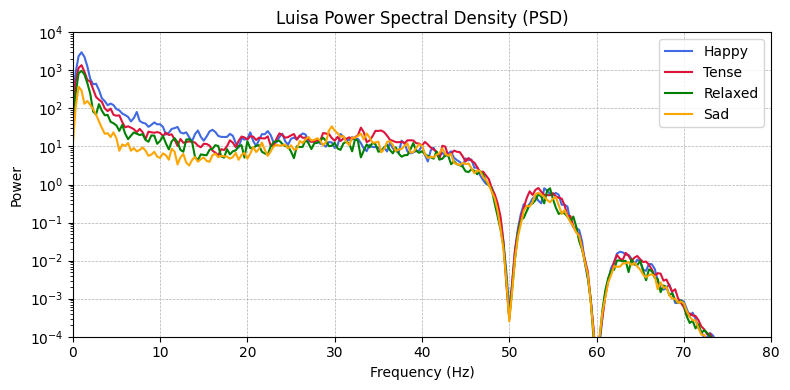

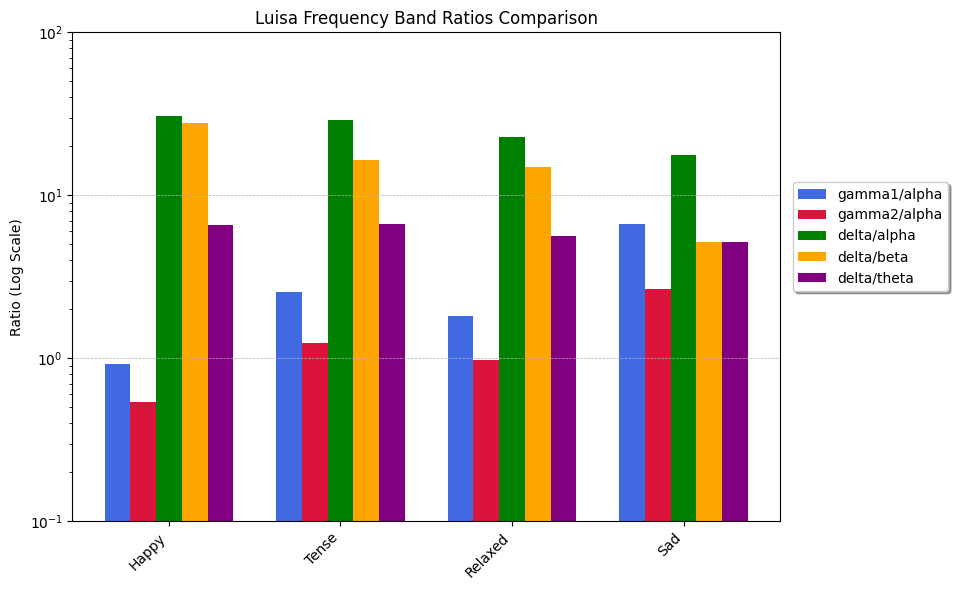

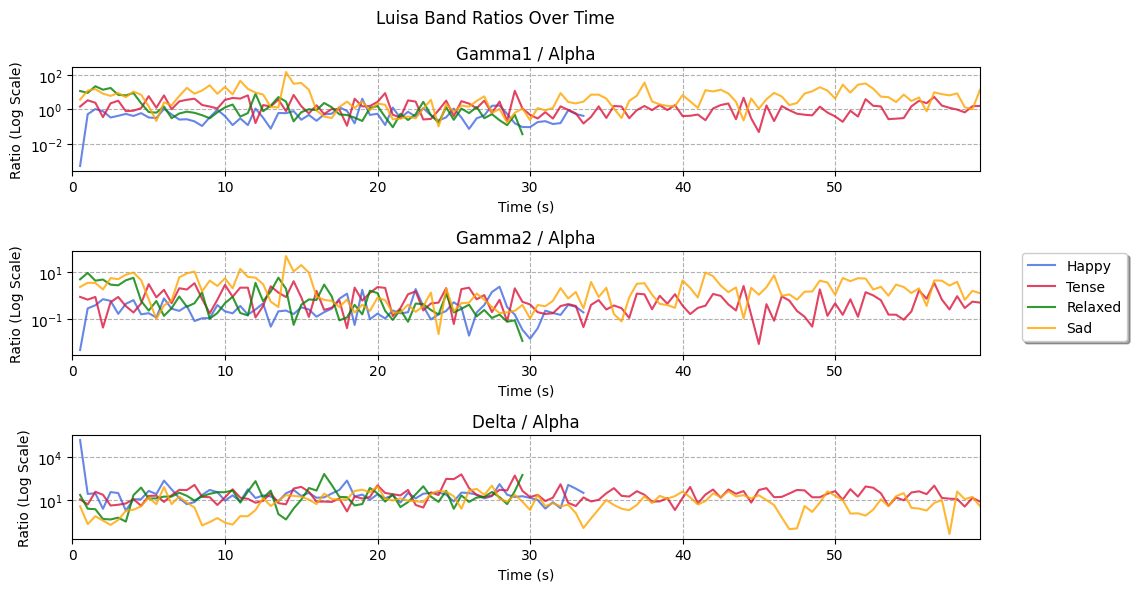

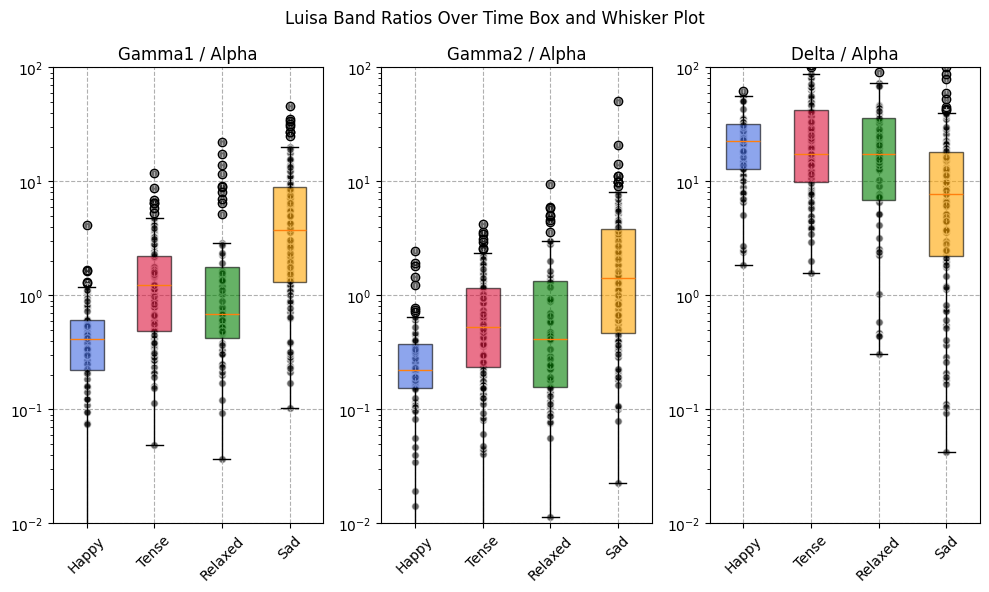

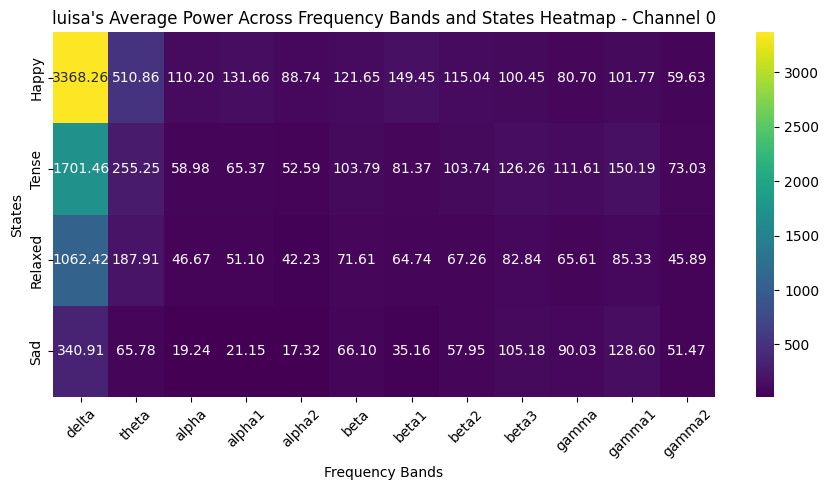

In [ ]:
# Define file paths and labels
file_paths = [
    '.../Subject 6 Luisa/Happy_0_Meisner.txt',
    '.../Subject 6 Luisa/Tense_0_Meisner.txt',
    '.../Subject 6 Luisa/Relaxed_9.txt',
    '.../Subject 6 Luisa/Sad_0_Maisner.txt'
]

labels = [
    "Happy",
    "Tense",
    "Relaxed",
    "Sad"
]

# Load EEG data with correct labels
luisa_data = load_eeg_data(file_paths=file_paths, data_type="openbci", 
                     segments=[(60,120)], 
                     fs=200, labels=labels, channel=0)  

for i,(state, data) in enumerate(luisa_data.items()):
    luisa_mask = abs(data - np.mean(data)) > 2 * np.std(data) # Identify outliers
    
    # Replace outliers using linear interpolation
    indices = np.arange(len(data)) 
    ch_cleaned = np.copy(data)
    ch_cleaned[luisa_mask] = np.interp(indices[luisa_mask], indices[~luisa_mask], data[~luisa_mask])
    
    luisa_data[state] = ch_cleaned

# Apply filters while preserving labels
luisa_filtered_data = apply_filters(luisa_data, fs=200)

# Plot PSD with correct labels
plot_psd(data_dict=luisa_filtered_data, y_axis_limits=[1e-4, 1e4], fs=200,name="Luisa")

# Calculate and plot band ratios
ratios = calculate_ratios(luisa_filtered_data, fs=200, selected_ratios=[("gamma1", "alpha"), ("gamma2", "alpha"), 
                                                                  ("delta", "alpha"), ("delta", "beta"),("delta","theta")])
plot_ratios_bar(ratios, y_axis_limits=[1e-1, 1e2],name="Luisa")

# plot_spectrogram(luisa_filtered_data, fs=200,vmax=3)

plot_band_ratios_spectrogram(luisa_filtered_data, fs=200, selected_ratios=[("gamma1","alpha"), ("gamma2","alpha"), ("delta", "alpha")],
                             y_axis_limits=None,name="Luisa")

plot_band_ratios_box_whisker(luisa_filtered_data, fs=200, selected_ratios=[("gamma1","alpha"), ("gamma2","alpha"), ("delta", "alpha")], 
                             y_axis_limits=[1e-2,1e2],name="Luisa")

# # Plot heatmap
# plot_band_ratio_heatmap(luisa_filtered_data, fs=200, name="luisa",channel=0)

plot_avg_power_heatmap(luisa_filtered_data, fs=200, name="luisa",channel=0)

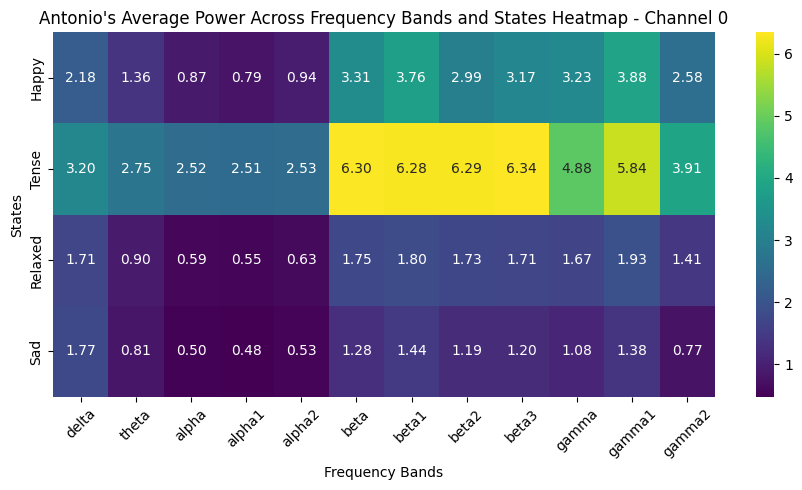

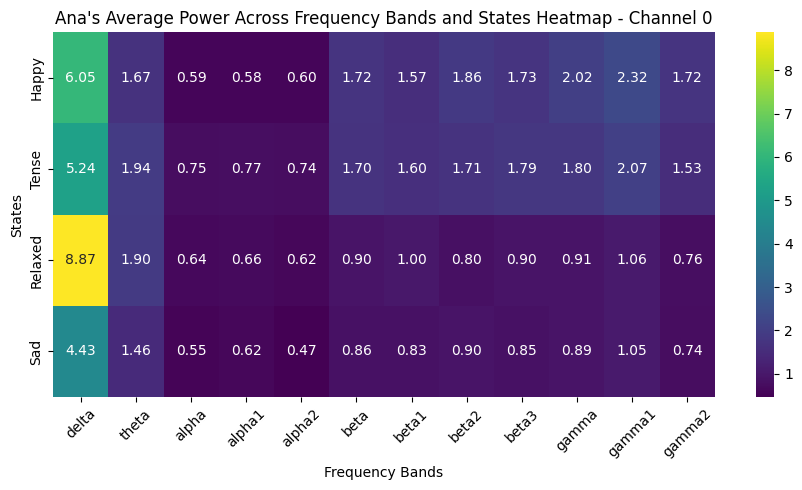

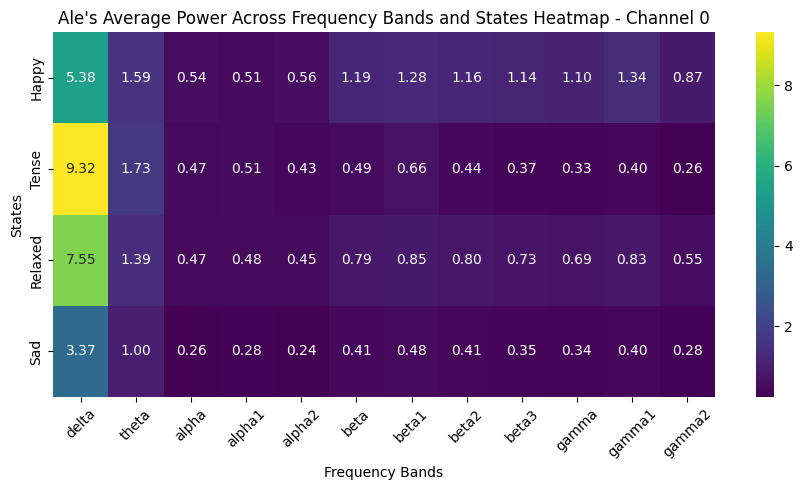

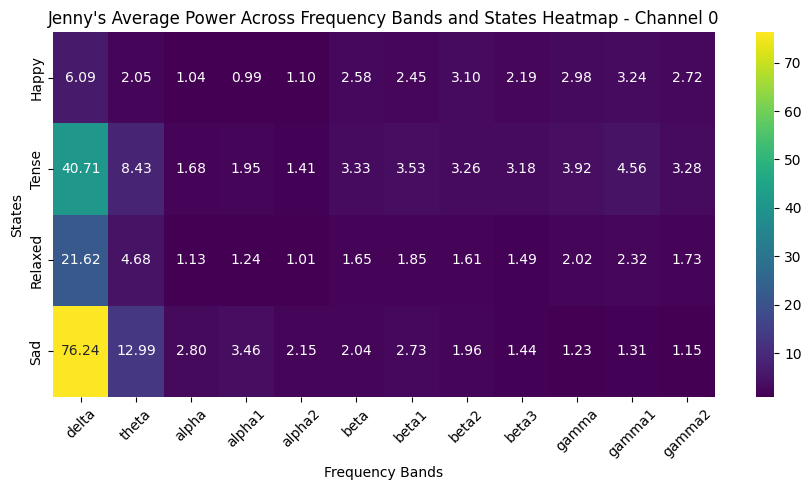

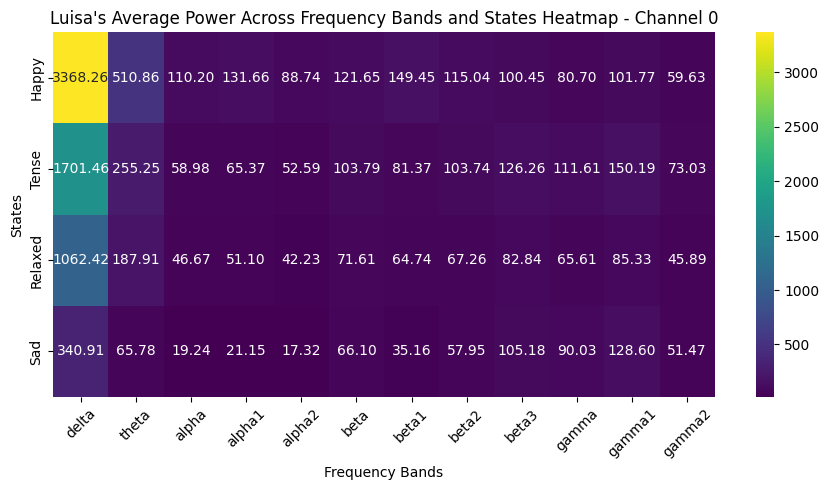

In [192]:
# All avg sub-band power heatmaps for every participant 

plot_avg_power_heatmap(antonio_filtered_data, fs=200, name="Antonio",channel=0)
plot_avg_power_heatmap(ana_filtered_data, fs=200, name="Ana",channel=0)
plot_avg_power_heatmap(ale_filtered_data, fs=200, name="Ale",channel=0)
plot_avg_power_heatmap(jenny_filtered_data, fs=200, name="Jenny",channel=0)
plot_avg_power_heatmap(luisa_filtered_data, fs=200, name="Luisa",channel=0)



# Notes on results

- Antonio, Ale, Ana, Jenny show higher gamma1/alpha in Happy State
    - Luisa is the reverse